<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Анастасия! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Инструкция по выполнению проекта**
Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг. 
Поэкспериментируйте и сравните характеристики моделей: время обучения, время предсказания, точность результата.
**Основные шаги:**
- Загрузите данные, путь к файлу: /datasets/autos.csv.
- Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
- Подготовьте выборки для обучения моделей.
- Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
- Проанализируйте время обучения, время предсказания и качество моделей.
- Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

**Примечания:**
- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.

**Описание данных**
Данные находятся в файле /datasets/autos.csv. Скачать датасет. 
**Признаки**
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

**Целевой признак**
- Price — цена (евро)

## Подготовка данных

Загрузите данные, путь к файлу: /datasets/autos.csv.

In [158]:
!pip install phik

In [159]:
!pip install -U scikit-learn

In [167]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 23.8 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2


In [168]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [169]:
# Загрузим данные
autos_data = pd.read_csv('/datasets/autos.csv')

**Вывод:** Загрузили данные датафрейма о технических характеристиках, комплектации и ценам автомобилей.

Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.

In [170]:
autos_data.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
150548,2016-03-29 14:37:17,4300,sedan,2005,manual,122,vectra,150000,3,petrol,opel,no,2016-03-29 00:00:00,0,6343,2016-04-05 23:46:56
281833,2016-03-15 12:47:19,950,wagon,1997,manual,75,astra,150000,10,petrol,opel,no,2016-03-15 00:00:00,0,74382,2016-04-06 01:15:24
229387,2016-03-23 11:52:21,2900,convertible,1999,manual,0,3er,150000,5,petrol,bmw,no,2016-03-23 00:00:00,0,71083,2016-03-23 11:52:21
128205,2016-03-25 18:58:29,2300,sedan,2002,manual,136,5er,150000,6,gasoline,bmw,no,2016-03-25 00:00:00,0,66538,2016-03-28 18:46:54
352110,2016-03-13 15:21:27,3700,sedan,2005,manual,110,civic,150000,1,petrol,honda,no,2016-03-13 00:00:00,0,65326,2016-03-20 07:48:38
292388,2016-03-20 16:37:41,3900,wagon,2008,manual,101,clio,80000,0,petrol,renault,NaN,2016-03-20 00:00:00,0,32657,2016-03-20 16:37:41
277374,2016-03-30 20:51:52,777,small,1998,manual,60,NaN,150000,3,petrol,opel,no,2016-03-30 00:00:00,0,48734,2016-04-01 15:48:04
339119,2016-03-25 21:53:51,3500,coupe,1995,manual,174,golf,60000,7,petrol,volkswagen,no,2016-03-25 00:00:00,0,73430,2016-04-07 07:44:37
99484,2016-03-25 11:46:55,450,coupe,1995,manual,102,3er,150000,4,petrol,bmw,no,2016-03-25 00:00:00,0,86399,2016-04-06 12:15:47
246191,2016-03-08 12:49:32,450,small,1971,manual,34,kaefer,20000,3,petrol,volkswagen,yes,2016-03-08 00:00:00,0,48324,2016-03-29 06:47:27


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Признаки DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen' являются неинформативными, их можно удалить

In [171]:
# Список  неинформативных признаков
columns_to_drop = ['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']

# Удаление  неинформативных признаков
autos_data.drop(columns=columns_to_drop, inplace=True)


In [172]:
print(autos_data.columns)# проверка результатов - перечень названий столбцов

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')


In [173]:
# Функция для преобразования строки в змеиный стиль
def snake_case(s):
    return s.strip().lower().replace(' ', '_')

# Применение функции к названиям столбцов и переименование столбцов
autos_data.rename(columns=snake_case, inplace=True)


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [174]:
print(autos_data.columns)

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'fueltype', 'brand', 'repaired'],
      dtype='object')


In [175]:
autos_data.rename(columns={'registrationyear': 'registration_year', 'vehicletype': 'vehicle_type', 
                           'fueltype': 'fuel_type'}, inplace=True)


In [176]:
print(autos_data.columns)

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')


In [177]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354369 non-null  int64 
 1   vehicle_type       316879 non-null  object
 2   registration_year  354369 non-null  int64 
 3   gearbox            334536 non-null  object
 4   power              354369 non-null  int64 
 5   model              334664 non-null  object
 6   kilometer          354369 non-null  int64 
 7   fuel_type          321474 non-null  object
 8   brand              354369 non-null  object
 9   repaired           283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [178]:
autos_data.describe(include = "all")

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
count,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,321474,354369,283215
unique,NaN,8,NaN,2,NaN,250,NaN,7,40,2
top,NaN,sedan,NaN,manual,NaN,golf,NaN,petrol,volkswagen,no
freq,NaN,91457,NaN,268251,NaN,29232,NaN,216352,77013,247161
mean,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,NaN,NaN,NaN
std,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,NaN,NaN,NaN
min,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,NaN,NaN,NaN
25%,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,NaN,NaN,NaN
50%,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,NaN,NaN,NaN
75%,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,NaN,NaN,NaN


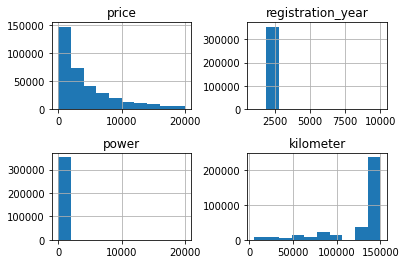

In [179]:
autos_data.hist() 
plt.subplots_adjust(wspace=.4, hspace=.5)

In [180]:
# Проверка на пропуски
missing_values = autos_data.isnull().sum()
print("Пропуски в данных:")
print(autos_data.loc[:, missing_values > 0])

# Проверка на дубликаты
duplicates = autos_data.duplicated().sum()
print("\nКоличество дубликатов в данных:", duplicates)

Пропуски в данных:
       vehicle_type gearbox        model fuel_type repaired
0               NaN  manual         golf    petrol      NaN
1             coupe  manual          NaN  gasoline      yes
2               suv    auto        grand  gasoline      NaN
3             small  manual         golf    petrol       no
4             small  manual        fabia  gasoline       no
...             ...     ...          ...       ...      ...
354364          NaN  manual         colt    petrol      yes
354365          NaN     NaN          NaN       NaN      NaN
354366  convertible    auto       fortwo    petrol       no
354367          bus  manual  transporter  gasoline       no
354368        wagon  manual         golf  gasoline      NaN

[354369 rows x 5 columns]

Количество дубликатов в данных: 45040


In [181]:
autos_data.drop_duplicates(inplace=True)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [182]:
autos_data.price.value_counts()

0        8904
500      4650
1500     4533
1000     3875
1200     3799
         ... 
1654        1
5748        1
7285        1
11379       1
8188        1
Name: price, Length: 3731, dtype: int64

Есть цена близкая к нулю, восстановить по среднему значению будет некоректно, так как признак целевой и это напрямую может повлиять на прогноз.

In [183]:
# Удаление нулей из целевого признака
autos_data = autos_data.query('price > 0')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

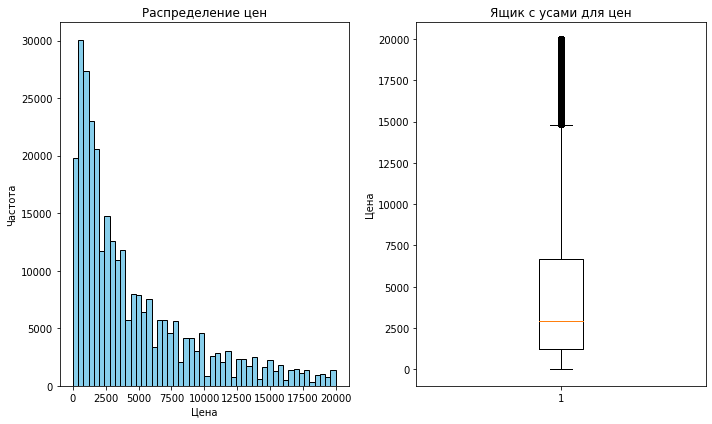

In [184]:
plt.figure(figsize=(10, 6))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(autos_data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')

# Ящик с усами
plt.subplot(1, 2, 2)
plt.boxplot(autos_data['price'])
plt.title('Ящик с усами для цен')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()


По данным цены видны странные данные у нуля и длинный хвост возле 15000 евро.

In [185]:
quantiles = autos_data['price'].quantile([0.05, 0.5, 0.75, 0.9, 0.95, 0.99])
print(quantiles)


0.05      350.0
0.50     2900.0
0.75     6650.0
0.90    11800.0
0.95    14900.0
0.99    18900.0
Name: price, dtype: float64


In [186]:
# Расчет % строк, где цена 350 > цена < 14900
price_between_350_and_14900 = autos_data[(autos_data['price'] < 350) | (autos_data['price'] > 14900)].shape[0]
percent_price_between_350_and_14900 = (price_between_350_and_14900 / autos_data.shape[0]) * 100

print("% строк, где цена 350 > цена < 14900: {:.2f}%".format(percent_price_between_350_and_14900))



% строк, где цена 350 > цена < 14900: 9.73%


Таких строк около 8%, можно их исключить

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [187]:
# Определение индексов строк, где цена одновременно меньше 350 и больше 14900
index_to_drop = autos_data[(autos_data['price'] < 350) | (autos_data['price'] > 14900)].sample(frac=0.1).index

# Удаление строк по индексам
autos_data.drop(index_to_drop, inplace=True)

# Проверка результатов
print("Размерность данных после удаления:", autos_data.shape)


Размерность данных после удаления: (297503, 10)


In [188]:
print(autos_data.columns)

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')


In [189]:
registration_years = autos_data['registration_year'].value_counts()
registration_years

2000    19625
2005    18829
1999    18139
2006    16938
2001    16776
        ...  
1949        1
2222        1
5300        1
8888        1
2290        1
Name: registration_year, Length: 139, dtype: int64

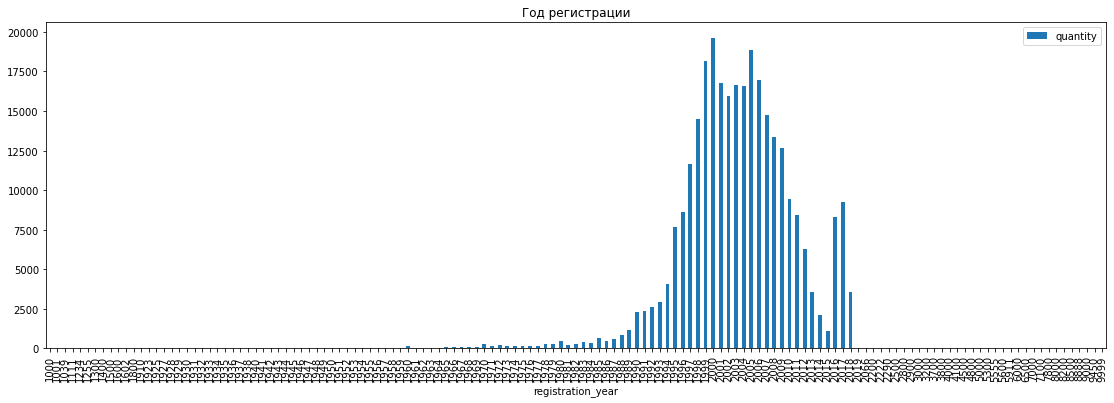

In [190]:
auto = autos_data.pivot_table(index='registration_year', values='brand', aggfunc='count')
auto.columns = ['quantity']
auto.plot.bar(figsize = (19,6))
plt.title('Год регистрации')
plt.show()

Видим , что есть длинный хвост распределения по году выпуска

In [191]:
#посмотрим на послежнюю дату скачивания анкеты из базы
DateCrawled = pd.read_csv('/datasets/autos.csv')
DateCrawled.DateCrawled.max()

'2016-04-07 14:36:58'

In [192]:
# Скорее всего авто ранее 1975 года и позже 2016 года (ограничение базы данных) были зарегитсрированы
autos_data = autos_data.query('1975 < registration_year < 2017')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [193]:
autos_data.power.value_counts()

0        28435
75       17794
150      11808
60       11723
140      10347
         ...  
6045         1
671          1
572          1
15001        1
6006         1
Name: power, Length: 674, dtype: int64

count    282467.000000
mean        112.905808
std         194.508202
min           0.000000
25%          73.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

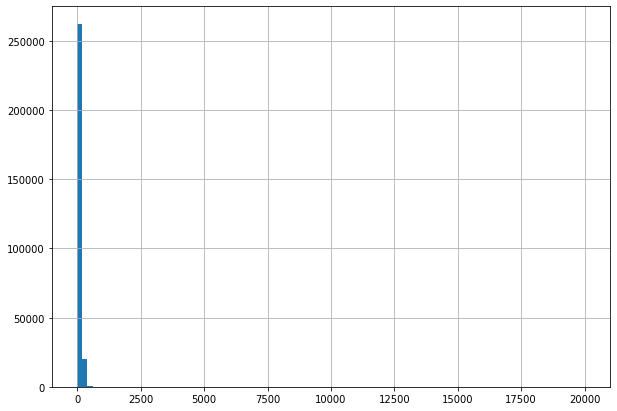

In [194]:
autos_data['power'].hist(bins=100, figsize=(10,7))
autos_data['power'].describe()

Видим большой хвост распределения мощности авто. Возможная мощность авто самая минимальная 5 л.с., а максимальная 1300 л.с. Исключим такие случаи

In [195]:
autos_data = autos_data.query('5 <= power <= 1300')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [196]:
autos_data.kilometer.value_counts()

150000    165579
125000     28210
100000     11325
90000       9163
80000       8003
70000       6994
60000       5931
50000       4966
40000       3941
30000       3364
20000       2886
5000        2598
10000        811
Name: kilometer, dtype: int64

In [197]:
autos_data.brand.value_counts()

volkswagen        52251
bmw               27237
opel              26987
mercedes_benz     23914
audi              21954
ford              17961
renault           12027
peugeot            8279
fiat               6689
seat               5165
skoda              4418
mazda              4247
smart              4096
citroen            3906
toyota             3672
nissan             3622
hyundai            2819
mini               2591
volvo              2484
mitsubishi         2309
honda              2191
kia                1885
suzuki             1805
alfa_romeo         1794
sonstige_autos     1425
chevrolet          1327
chrysler           1076
dacia               732
subaru              606
daihatsu            564
porsche             542
jeep                528
saab                434
land_rover          411
jaguar              404
daewoo              374
lancia              348
rover               335
trabant             223
lada                139
Name: brand, dtype: int64

In [198]:
autos_data['gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [199]:
#замена nan на 'manual':
autos_data.fillna({'gearbox':'manual'}, inplace=True)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [200]:
#замена в gearbox значение manual на 1, auto - на 0:
autos_data.loc[(autos_data.gearbox == 'manual'), 'gearbox'] = 1   
autos_data.loc[(autos_data.gearbox == 'auto'), 'gearbox'] = 0

In [201]:
autos_data.gearbox = autos_data.gearbox.astype('int')

In [202]:
autos_data['repaired'].unique()

array(['yes', nan, 'no'], dtype=object)

In [203]:
#замена nan на 'yes', так как обычно подержанные машины были в ремонте:
autos_data.fillna({'repaired':'yes'}, inplace=True)

In [204]:
#замена в repaired значение yes на 1, no - на 0:
autos_data.loc[(autos_data.repaired == 'yes'), 'repaired'] = 1
autos_data.loc[(autos_data.repaired == 'no'), 'repaired'] = 0

In [205]:
autos_data.repaired = autos_data.repaired.astype('int')

In [206]:
autos_data['model'].unique()

array([nan, 'grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'one', 'fortwo', '1er',
       'b_klasse', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito',
       'sprinter', 'astra', 'escort', 'forester', 'xc_reihe', 'scenic',
       'ka', 'a1', 'focus', 'a4', 'tt', 'a6', 'jazz', 'omega', 'slk',
       '7er', 'combo', '80', '147', 'z_reihe', 'sorento', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'insignia', 'almera', 'megane',
       'a3', 'lupo', 'r19', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'corsa', 'vectra', 'berlingo', 'tiguan', '6_reihe',
       'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo', '5_reihe',
       'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe', '6er', 'modus',
       'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan', 'spider',
       'cuore', 's_max', 'a

In [207]:
#замена nan на 'unknown':
autos_data.fillna({'model':'unknown'}, inplace=True)
autos_data.model.value_counts()

golf                  19728
other                 18274
3er                   14497
unknown               10274
polo                   8381
                      ...  
samara                    4
kalina                    4
serie_2                   3
rangerover                2
range_rover_evoque        1
Name: model, Length: 249, dtype: int64

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [208]:
autos_data['vehicle_type'].unique()

array(['coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       nan, 'other'], dtype=object)

In [209]:
#замена nan на unknown:
autos_data.fillna({'vehicle_type':'other'}, inplace=True)
autos_data.vehicle_type.value_counts()

sedan          70019
small          58313
wagon          50705
bus            23261
convertible    16449
coupe          12831
other          12631
suv             9562
Name: vehicle_type, dtype: int64

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [210]:
autos_data['fuel_type'].unique()

array(['gasoline', 'petrol', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [211]:
#замена nan на unknown:
autos_data.fillna({'fuel_type':'other'}, inplace=True)
autos_data.fuel_type.value_counts()

petrol      159002
gasoline     74918
other        14883
lpg           4273
cng            439
hybrid         186
electric        70
Name: fuel_type, dtype: int64

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [212]:
autos_data.corr()['price']

price                1.000000
registration_year    0.536802
gearbox             -0.239715
power                0.465929
kilometer           -0.372885
repaired            -0.272548
Name: price, dtype: float64

interval columns not set, guessing: ['price', 'registration_year', 'gearbox', 'power', 'kilometer', 'repaired']


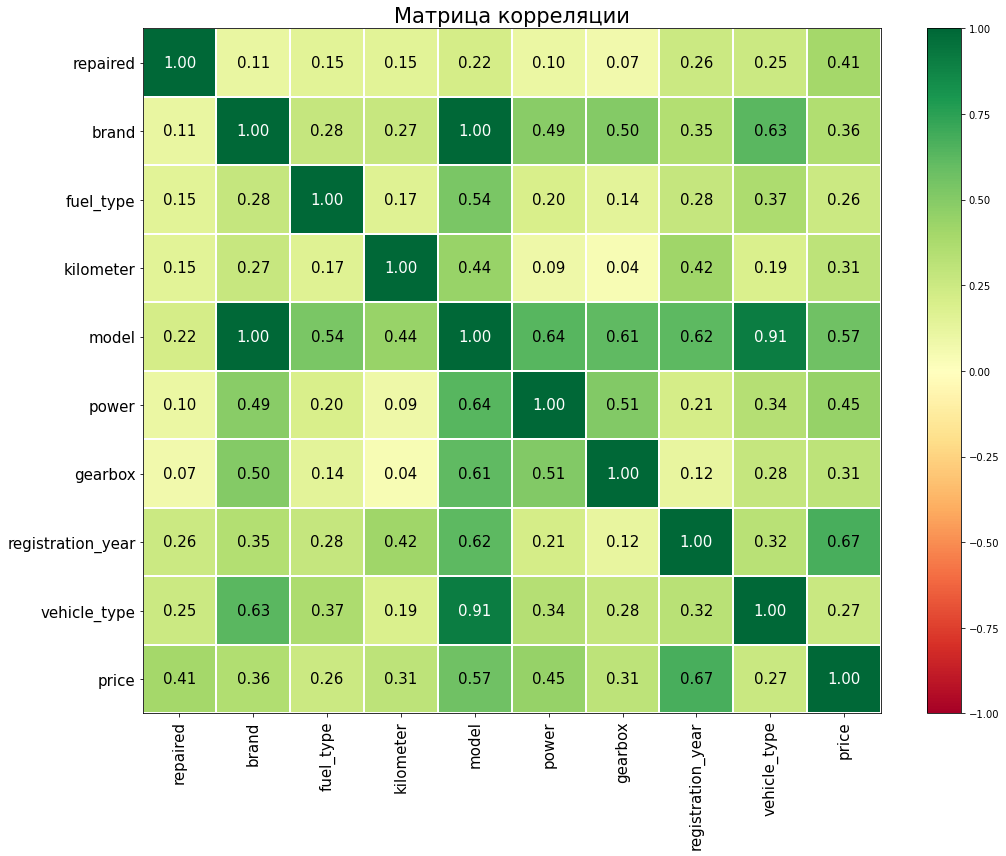

In [213]:
# вычисление коэффициентов корреляции phi
phik_overview = autos_data.phik_matrix()

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"Матрица корреляции",
    fontsize_factor=1.5,
    figsize=(15, 12)
)


По данным корреляционного анализа видно, что все числовые признаки имеют среднюю и слабую корреляцию между собой и с целевым признаком. Наибольшей прямой корреляцией с целевым признаком обладает признак registration_year, а обратной корреляцией kilometer. После предварительной обработки данных видно, что требуется все категориальные признаки кодировать с помощью OneHotEncoding.

In [214]:
column=['price', 'registration_year','power', 'kilometer','gearbox']

In [215]:
data=autos_data[column]
data[:5]

,price,registration_year,power,kilometer,gearbox
1,18300,2011,190,125000,1
2,9800,2004,163,125000,0
3,1500,2001,75,150000,1
4,3600,2008,69,90000,1
5,650,1995,102,150000,1


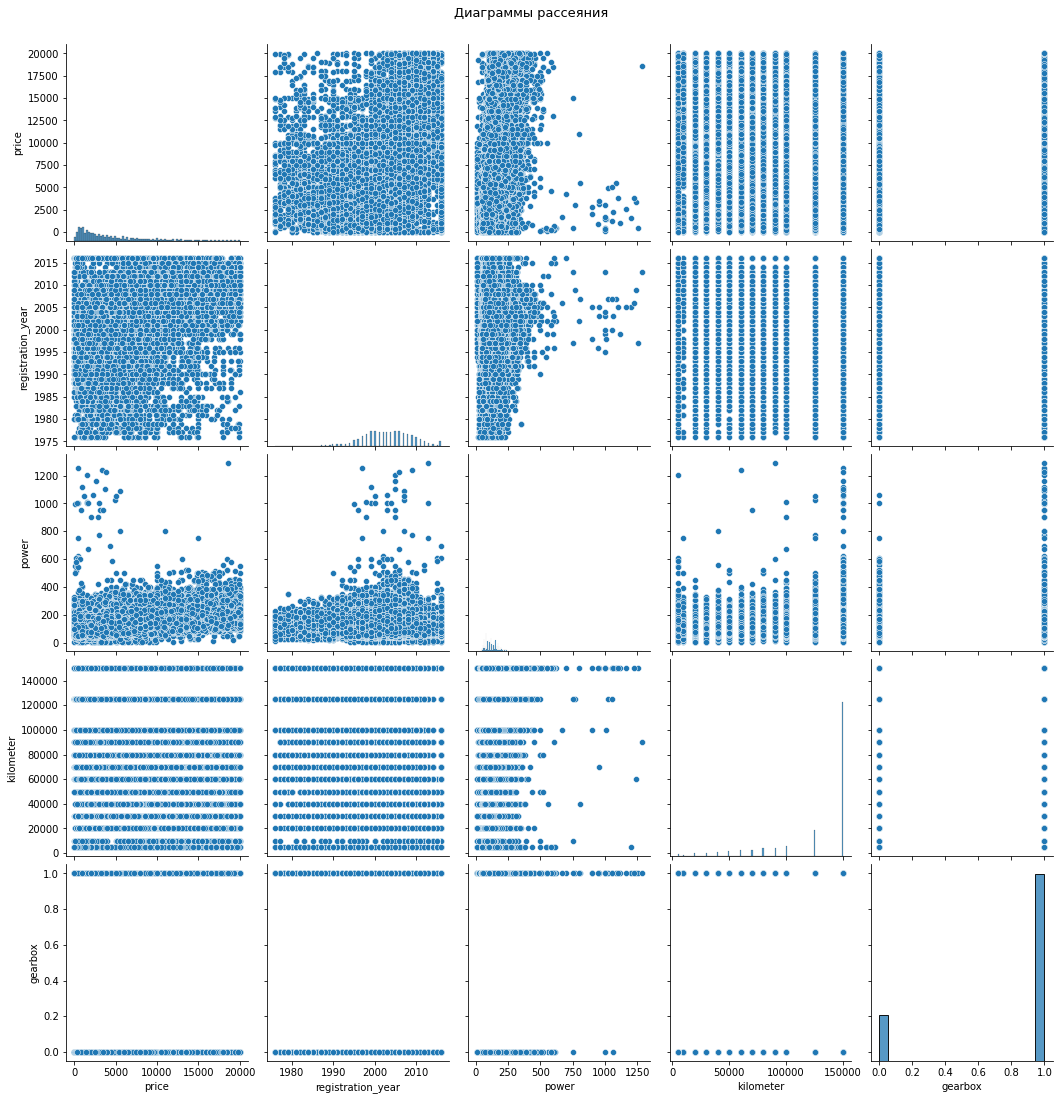

In [216]:
# Построение диаграмм рассеяния
sns.pairplot(data[:100000], height=3, diag_kind='hist')
plt.suptitle("Диаграммы рассеяния", y=1.02, fontsize=13)
plt.show()

На графике видно, что начиная с 1980 года стоимосоть автомобиля увеличивается с каждым годом и имеет линейную зависимость.

**Выводы:**
- исключили признаки, не влияющие цену авто (DateCrawled, RegistrationMonth, DateCreated, NumberOfPictures, PostalCode и LastSeen)
- привели все названия признаков к единому "змеиному" стилю
- удалили дубликаты
- исключили "выбросы" в признаках:
"Price"- 8% строк, где цена меньше 350 и больше 14900 евро, 
"Registrationyear" - строки, где год регистрации до 1975 года и после 2016 года
"Power" - строки, где мощность авто меньше 5 и больше 1300 л.с.
- заполнили пропуски в признаках:
"Gearbox" - на "manual"
"Repaired" - на "yes"
"Model", "Vehicletype", "Fueltype" - значением 'other'
Корреляция цены с годом регистрации, мощностью и пробегом довольно высока. При этом отрицательная корреляция с типом коробки передач и фактом ремонта говорит о том, что цена уменьшается для автомобилей с автоматической коробкой передач и для тех, которые были в ремонте.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно посмотреть корреляции, как обязательый элемент ИАД.~~</font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️ </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'>~~Матрица корреляций Пирсона не подходит для анализа датасетов, в которых присутствуют категориальные или дискретные признаки - по ним корреляций Пирсона не может быть оценена вообще (в случае категориальных) или не может быть оценена корректно (в случае дискретных).~~</font>

<font color='darkorange'>Можно использовать коэффициент корреляции ϕ , это передовой способ вычисления коэффициентов корреляции для любых типов признаков. Кроме того, в библиотеке есть визуализация. Стоит учитывать, что этот коэффициент показывает не только линейные связи, но и нелинейные. Более подробно понять вид связи поможет визуализация с помощью диаграмм рассеяния. Ссылка на документацию: https://phik.readthedocs.io/en/latest/
Пример кода:</font>
```python
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = [...]

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)
```

<font color='purple'><b>Комментарий студента 2:</b></font> Исправила. Спасибо большое за пояснение </b></font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

Подготовим выборки для обучения моделей.

In [219]:
RANDOM_STATE = 42

In [223]:
def get_data_info(autos_data):
    display(autos_data.sample(5))
    display(autos_data.info())
    display(autos_data.describe(include='all'))

In [224]:
#Выделение признаков и целевого признака:
features = autos_data.drop(['price'], axis=1)
target = autos_data['price']

In [225]:
# Разделение данных на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM_STATE)

In [226]:
get_data_info(features_train)

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
138099,sedan,1999,1,101,bora,150000,petrol,volkswagen,0
94990,small,2004,1,75,forfour,150000,petrol,smart,0
313840,small,2004,1,64,ibiza,150000,petrol,seat,0
243047,suv,2012,1,150,x_trail,50000,gasoline,nissan,0
328827,sedan,2002,0,306,e_klasse,150000,petrol,mercedes_benz,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 190328 entries, 142014 to 159172
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicle_type       190328 non-null  object
 1   registration_year  190328 non-null  int64 
 2   gearbox            190328 non-null  int64 
 3   power              190328 non-null  int64 
 4   model              190328 non-null  object
 5   kilometer          190328 non-null  int64 
 6   fuel_type          190328 non-null  object
 7   brand              190328 non-null  object
 8   repaired           190328 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 14.5+ MB


None

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
count,190328,190328.000000,190328.000000,190328.000000,190328,190328.000000,190328,190328,190328.000000
unique,8,NaN,NaN,NaN,249,NaN,7,40,NaN
top,sedan,NaN,NaN,NaN,golf,NaN,petrol,volkswagen,NaN
freq,52464,NaN,NaN,NaN,14764,NaN,119326,39245,NaN
mean,NaN,2003.048180,0.797854,121.684634,NaN,127591.736371,NaN,NaN,0.257345
std,NaN,6.130296,0.401601,56.496273,NaN,37134.151058,NaN,NaN,0.437172
min,NaN,1976.000000,0.000000,5.000000,NaN,5000.000000,NaN,NaN,0.000000
25%,NaN,1999.000000,1.000000,80.000000,NaN,125000.000000,NaN,NaN,0.000000
50%,NaN,2003.000000,1.000000,114.000000,NaN,150000.000000,NaN,NaN,0.000000
75%,NaN,2007.000000,1.000000,150.000000,NaN,150000.000000,NaN,NaN,1.000000


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово, что у нас есть выборка для тестов!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~`get_dummies` - хороший инструмент для быстрого анализа, но для Машинного обучения не подходит. Если в  новых данных набор категорий будет отличаться, получить данные с такой-же размерностью будет нельзя. Для возможности работы модели с новыми данными нужен OneHotEncoder.~~</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Энкодер можно обучать только на обучающих данных.\
Валидационную и тестовую выборки только трансформируем.\
Что бы не возникало ошибок с неизвесными категориями, нужно использовать параметры энкодера: `handle_unknown`, `unknown_value` или `encoded_missing_value`~~</font>\
https://dzen.ru/a/Yn9PMjevTnNjve2a

<font color='purple'><b>Комментарий студента:</b></font> ✔️ </b></font>

In [227]:
# Разделение данных на обучающую, валидационную и тестовую выборки
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Создаем трансформер для заполнения пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')

# Заполняем пропущенные значения для категориальных признаков
features_train[['vehicle_type', 'fuel_type', 'brand', 'model']] = imputer.fit_transform(features_train[['vehicle_type', 'fuel_type', 'brand', 'model']])
features_valid[['vehicle_type', 'fuel_type', 'brand', 'model']] = imputer.transform(features_valid[['vehicle_type', 'fuel_type', 'brand', 'model']])
features_test[['vehicle_type', 'fuel_type', 'brand', 'model']] = imputer.transform(features_test[['vehicle_type', 'fuel_type', 'brand', 'model']])

# Создаем объект OneHotEncoder с параметром drop='first'
encoder = OneHotEncoder(sparse=False, drop='first')

# Применяем OneHotEncoder к категориальным признакам
features_train_encoded = encoder.fit_transform(features_train[['vehicle_type', 'fuel_type', 'brand', 'model']])
features_valid_encoded = encoder.transform(features_valid[['vehicle_type', 'fuel_type', 'brand', 'model']])
features_test_encoded = encoder.transform(features_test[['vehicle_type', 'fuel_type', 'brand', 'model']])

# Преобразуем результаты в DataFrame
features_train_encoded_df = pd.DataFrame(features_train_encoded, columns=encoder.get_feature_names(['vehicle_type', 'fuel_type', 'brand', 'model']), index=features_train.index)
features_valid_encoded_df = pd.DataFrame(features_valid_encoded, columns=encoder.get_feature_names(['vehicle_type', 'fuel_type', 'brand', 'model']), index=features_valid.index)
features_test_encoded_df = pd.DataFrame(features_test_encoded, columns=encoder.get_feature_names(['vehicle_type', 'fuel_type', 'brand', 'model']), index=features_test.index)

# Объединяем закодированные признаки с числовыми признаками
features_train_final = pd.concat([features_train.drop(['vehicle_type', 'fuel_type', 'brand', 'model'], axis=1), features_train_encoded_df], axis=1)
features_valid_final = pd.concat([features_valid.drop(['vehicle_type', 'fuel_type', 'brand', 'model'], axis=1), features_valid_encoded_df], axis=1)
features_test_final = pd.concat([features_test.drop(['vehicle_type', 'fuel_type', 'brand', 'model'], axis=1), features_test_encoded_df], axis=1)


ValueError: Found unknown categories ['rangerover'] in column 3 during transform

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='red'> При разбиении на выборки не все значения категорий попали в обучающие данные, это вызывает ошибки при трансформации тестовых данных, поскольку Энкодер не знает как обозначить новую категорию - ему про неё ничего не известно из обучающих данных.\
Для работы с такими случаями предусмотрен алгоритм обработки неизвестных категорий в Энкодерах. Задаётся он параметром `handle_unknown="ignore"`.\
Однако, в окружении Практикума стоит sklearn 0.24.1, в этой версии сочетание параметров drop="first" и handle_unknown="ignore" невозможно. Библиотеку sklearn нужно обновить до последней версии, или хотя бы до версии >= 1.3.1>\
Обновить до последней версии:</font>
```
!pip install -Uq scikit-learn
```

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> ~~Предобработчики можно обучать только на обучающих данных.\
Валидационную и тестовую выборки только трансформируем.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'>~~Для линейных моделей обязательно указывать параметр `drop='first'` в OneHotEncoder. Например, есть у тебя некий бинарный признак. Без дропа у тебя создастся 2 колонки, причём всегда в одной будет 0, в другой - 1, потому что признак не может принимать сразу 2 значения. Математически можно записать, что признак1 + признак2 = 1, либо признак1 + признак2 - 1 = 0. Говоря терминами математики, это линейно зависимые признаки. А линейно зависимые признаки - это мультиколлнеарность, явление, мешающее обучение линейных моделей. Так что добавь, дроп, пожалуйста.~~</font>

<font color='purple'><b>Комментарий студента 2:</b></font> ✔️ </b></font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Отлично, что Трансформеры обучаются только на обучающих данных.</font>

**Выводы:** Подготовили выборку для обучения моделей, разделелили данные на обучающую и тестовую выборки.

## Обучение моделей

**1. Модель LinearRegression**

In [ ]:
%%time

# Создание объекта модели линейной регрессии
model_lr_ohe = LinearRegression()

# Обучение модели на обучающих данных
model_lr_ohe.fit(features_train_encoded, target_train)

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='red'> Здесь обучать нужно на `features_train_final`, после последней доработки препроцессинга.</font>


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признаков соответсвует модели!</font>

In [ ]:
# Оценка качества модели на валидационной выборке с помощью кросс-валидации
cv_scores_lr_ohe = cross_val_score(model_lr_ohe, features_train_encoded, target_train, cv=5, scoring='neg_root_mean_squared_error')

# Переводим значения метрик из отрицательных в положительные
cv_scores_lr_ohe = -cv_scores_lr_ohe

# Выводим значение метрики RMSE на кросс-валидации
print("RMSE на кросс-валидации для модели линейной регрессии с OneHotEncoding:", cv_scores_lr_ohe.mean())

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Тестовую выборку нужно оставить для финального тестирования Лучшей модели. Для выбора лучшей модели и подбора гиперпараметров нужна ещё одна выборка - валидационная. Именно по ней оцениваются предсказания на "конкурс моделей". Или можно использовать кроссвалидацию, там валидационная выборка генерится автоматически.~~</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Линейные модели требуют OHE кодирования категорий.~~</font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️ </b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Кодирование признаков соответсвует модели!</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

In [ ]:
%%time

# Создание объекта модели линейной регрессии
model_lr_ohe = LinearRegression()

# Обучение модели на обучающих данных
model_lr_ohe.fit(features_train_encoded, target_train)

# Оценка качества модели на валидационной выборке с помощью кросс-валидации
cv_scores_lr_ohe = cross_val_score(model_lr_ohe, features_train_encoded, target_train, cv=5, scoring='neg_root_mean_squared_error')

# Переводим значения метрик из отрицательных в положительные
cv_scores_lr_ohe = -cv_scores_lr_ohe

# Выводим значение метрики RMSE на кросс-валидации
print("RMSE на кросс-валидации для модели линейной регрессии с OneHotEncoding:", cv_scores_lr_ohe.mean())

In [ ]:
import time

# Создание объекта модели линейной регрессии
model_lr_ohe = LinearRegression()

# Измеряем время начала обучения
start_time = time.time()

# Обучение модели на обучающих данных
model_lr_ohe.fit(features_train_encoded, target_train)

# Измеряем время окончания обучения и рассчитываем время выполнения обучения
end_time = time.time()
training_time_lr_ohe = end_time - start_time

# Выводим время обучения модели
print("Время обучения модели линейной регрессии с OneHotEncoding:", training_time_lr_ohe)



In [ ]:
# Измеряем время начала предсказания
start_time = time.time()

# Предсказываем целевой признак на тестовых данных
predictions_lr_ohe = model_lr_ohe.predict(features_test_encoded)

# Измеряем время окончания предсказания и рассчитываем время выполнения предсказания
end_time = time.time()
prediction_time_lr_ohe = end_time - start_time

# Выводим время предсказания модели
print("Время предсказания модели линейной регрессии с OneHotEncoding:", prediction_time_lr_ohe)


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Отлично что время обучения и время работы моделей измерено отдельно.</font>

**2. Модель LightGBMRegressor**

In [ ]:
%%time

# Преобразование категориальных признаков в тип "category"
features_train['vehicle_type'] = features_train['vehicle_type'].astype('category')
features_train['fuel_type'] = features_train['fuel_type'].astype('category')
features_train['brand'] = features_train['brand'].astype('category')
features_train['model'] = features_train['model'].astype('category')

features_test['vehicle_type'] = features_test['vehicle_type'].astype('category')
features_test['fuel_type'] = features_test['fuel_type'].astype('category')
features_test['brand'] = features_test['brand'].astype('category')
features_test['model'] = features_test['model'].astype('category')

# Создание объекта модели LightGBMRegressor
model_lgb = lgb.LGBMRegressor()

# Обучение модели на обучающих данных
model_lgb.fit(features_train, target_train)

# Предсказание целевого признака на тестовых данных
predictions_lgb = model_lgb.predict(features_test)

# Оценка качества модели на тестовых данных с помощью метрики RMSE
rmse_lgb = mean_squared_error(target_test, predictions_lgb, squared=False)
print("RMSE модели LightGBMRegressor:", rmse_lgb)

# Оценка качества модели на обучающей выборке с помощью кросс-валидации
cv_scores_lgb = cross_val_score(model_lgb, features_train, target_train, cv=5, scoring='neg_root_mean_squared_error')

# Переводим значения метрик из отрицательных в положительные
cv_scores_lgb = -cv_scores_lgb

# Выводим значение метрики RMSE на кросс-валидации
print("RMSE на кросс-валидации для модели LightGBMRegressor:", cv_scores_lgb.mean())


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично, что используешь алгоритмы LGBM для категориальных признаков.</font>

In [ ]:
# Измеряем время начала обучения модели LightGBMRegressor
start_time = time.time()

# Обучаем модель на обучающих данных
model_lgb.fit(features_train, target_train)

# Измеряем время окончания обучения модели LightGBMRegressor
end_time = time.time()
training_time_lgb = end_time - start_time

# Выводим время обучения модели LightGBMRegressor
print("Время обучения модели LightGBMRegressor:", training_time_lgb)


In [ ]:
# Измеряем время начала предсказания с помощью модели LightGBMRegressor
start_time = time.time()

# Предсказываем целевой признак на тестовых данных
predictions_lgb = model_lgb.predict(features_test)

# Измеряем время окончания предсказания с помощью модели LightGBMRegressor
end_time = time.time()
prediction_time_lgb = end_time - start_time

# Выводим время предсказания с помощью модели LightGBMRegressor
print("Время предсказания с помощью модели LightGBMRegressor:", prediction_time_lgb)


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Модели основанные на деревьях, могут работать с порядковым кодированием категорий (OrdinalEncoding). OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).~~</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>LightGBM может сам кодировать категориальные признаки, если перевести категориальные данные в тип "category"</font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️

**3. Модель RidgeCV**

In [ ]:
%%time


# Создаем объект модели регрессии RidgeCV с заданным диапазоном параметра alpha
alphas = [0.01, 0.1, 1.0, 10.0]
model_ridge = RidgeCV(alphas=alphas, cv=5)

# Измеряем время начала обучения
start_time = time.time()

# Обучаем модель на обучающих данных
model_ridge.fit(features_train_encoded, target_train)

# Измеряем время окончания обучения и рассчитываем время выполнения
end_time = time.time()
training_time = end_time - start_time
print("Время обучения модели регрессии Ridge с использованием кросс-валидации: {:.2f} сек".format(training_time))

# Предсказываем целевой признак на тестовых данных
predictions_ridge = model_ridge.predict(features_test_encoded)

# Оцениваем качество модели на тестовых данных с помощью метрики RMSE
rmse_ridge = mean_squared_error(target_test, predictions_ridge, squared=False)
print("RMSE модели регрессии Ridge с использованием кросс-валидации:", rmse_ridge)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> Тестовую выборку нужно оставить для финального тестирования Лучшей модели. Для выбора лучшей модели и подбора гиперпараметров нужна ещё одна выборка - валидационная. Именно по ней оцениваются предсказания на "конкурс моделей". Или можно использовать кроссвалидацию, там валидационная выборка генерится автоматически.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Все импорты должны быть в первой ячейке татрадки, что бы сразу были видны все зависимости кода.</font>

<font color='purple'><b>Комментарий студента 2:</b></font> ✔️ </b></font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='red'> По прежнему оценка по тестовой выборке. Нужно, по крайней мере `features_valid_final`,\
или кросс-валидация, как у LinearRegression()</font>

In [ ]:
# Измеряем время начала обучения модели RidgeCV
start_time = time.time()

# Обучаем модель на обучающих данных
model_ridge.fit(features_train_encoded, target_train)

# Измеряем время окончания обучения модели RidgeCV
end_time = time.time()
training_time_ridge = end_time - start_time

# Выводим время обучения модели RidgeCV
print("Время обучения модели регрессии Ridge с использованием кросс-валидации: {:.2f} сек".format(training_time_ridge))

In [ ]:
# Измеряем время начала предсказания с помощью модели RidgeCV
start_time = time.time()

# Предсказываем целевой признак на тестовых данных
predictions_ridge = model_ridge.predict(features_test_encoded)

# Измеряем время окончания предсказания с помощью модели RidgeCV
end_time = time.time()
prediction_time_ridge = end_time - start_time

# Выводим время предсказания с помощью модели RidgeCV
print("Время предсказания с помощью модели регрессии Ridge: {:.2f} сек".format(prediction_time_ridge))


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Линейные модели требуют OHE кодирования категорий.~~</font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Кодирование признаков соответсвует модели!</font>

**4. Модель CatBoostRegressor**

In [ ]:
%%time

# Разделение данных на обучающую, валидационную и тестовую выборки
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

# Создаем объект модели CatBoostRegressor
model_catboost = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=12345)

# Измеряем время начала обучения
start_time = time.time()

# Обучаем модель на обучающих данных
model_catboost.fit(features_train, target_train, cat_features=cat_features, verbose=100)

# Измеряем время окончания обучения и рассчитываем время выполнения
end_time = time.time()
training_time = end_time - start_time
print("Время обучения модели CatBoostRegressor:", training_time, "сек")

# Предсказываем целевой признак на валидационных данных
predictions_valid = model_catboost.predict(features_valid)

# Оцениваем качество модели на валидационных данных с помощью метрики RMSE
rmse_valid = mean_squared_error(target_valid, predictions_valid, squared=False)
print("RMSE модели CatBoostRegressor на валидационной выборке:", rmse_valid)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> ~~Тестовую выборку нужно оставить для финального тестирования Лучшей модели. Для выбора лучшей модели и подбора гиперпараметров нужна ещё одна выборка - валидационная. Именно по ней оцениваются предсказания на "конкурс моделей". Или можно использовать кроссвалидацию, там валидационная выборка генерится автоматически.~~</font>

<font color='purple'><b>Комментарий студента 2:</b></font> ✔️

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Здорово, что используешь валидационную выборку для оценки моделей.</font>\
<font color='darkorange'>Но, строго говоря, все модели нужно оценивать одинаково, Либо кросс-валидацией, Либо по валидационной выборке, но для всех одним и тем же методом.</font>

In [ ]:
import time

# Создаем список категориальных признаков
cat_features = ['vehicle_type', 'fuel_type', 'brand', 'model']

# Создаем объект модели CatBoostRegressor
model_catboost = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=12345)

# Измеряем время начала обучения
start_training_time = time.time()

# Обучаем модель на обучающих данных
model_catboost.fit(features_train, target_train, cat_features=cat_features, verbose=100)

# Измеряем время окончания обучения
end_training_time = time.time()

# Вычисляем время обучения
training_time = end_training_time - start_training_time
print("Время обучения модели CatBoostRegressor:", training_time, "сек")

# Измеряем время начала предсказания
start_prediction_time = time.time()

# Предсказываем целевой признак на тестовых данных
predictions_catboost = model_catboost.predict(features_test)

# Измеряем время окончания предсказания
end_prediction_time = time.time()

# Вычисляем время предсказания
prediction_time = end_prediction_time - start_prediction_time
print("Время предсказания модели CatBoostRegressor:", prediction_time, "сек")

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='red'> Здесь, то же, оценка на тестовых данных.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> CatBoost имеет встроенные алгоритмы обработки категориальных признаков, но для этого их надо передать списком в `cat_features =[]` </font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

**Вывод:** Обучили несколько моделей, включая линейную регрессию, CatBoostRegressor, с изменением гиперпараметров и на различных типах выборок - исходных данных, с обычным кодированием и с использованием One-Hot Encoding.
Некоторые модели показали значение RMSE выше порога в 2500, что может указывать на их недостаточную эффективность в данной задаче прогнозирования цен на автомобили. Поэтому для финального вывода будем рассматривать только модели, которые показали RMSE < 2500.

## Анализ моделей

In [ ]:
# Результаты для модели LinearRegression
time_lr_training = 14.76
time_lr_prediction = 0.02
rmse_lr = 3713.25

# Результаты для модели LightGBMRegressor
time_lgb_training = 4.99
time_lgb_prediction = 0.60
rmse_lgb = 1622.35

# Результаты для модели RidgeCV
time_ridge_training = 37.33
time_ridge_prediction = 0.19
rmse_ridge = 3720.37

# Результаты для модели CatBoostRegressor
time_catboost_training = 112.44
time_catboost_prediction = 0.37
rmse_catboost = 1601.20

# Создание списка с результатами
results = [
    {"Модель": "LinearRegression", "Время обучения (сек)": time_lr_training, "Время предсказания (сек)": time_lr_prediction, "RMSE": rmse_lr},
    {"Модель": "LightGBMRegressor", "Время обучения (сек)": time_lgb_training, "Время предсказания (сек)": time_lgb_prediction, "RMSE": rmse_lgb},
    {"Модель": "RidgeCV", "Время обучения (сек)": time_ridge_training, "Время предсказания (сек)": time_ridge_prediction, "RMSE": rmse_ridge},
    {"Модель": "CatBoostRegressor", "Время обучения (сек)": time_catboost_training, "Время предсказания (сек)": time_catboost_prediction, "RMSE": rmse_catboost},
]

# Создание DataFrame из списка результатов
df_results = pd.DataFrame(results)

# Вывод таблицы с результатами
print(df_results)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'>~~Выше получены другие результаты по времени и RMSE ~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Лучше сохранять значения в переменные и подавать в таблицу в виде переменных.</font>

<font color='purple'><b>Комментарий студента 2:</b></font> ✔️

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><S>Заказчику важны:
* качество предсказания;
* скорость предсказания;
* время обучения.

Для оценки и сравнения моделей нам понадобится время обучения модели и время предсказания. Их надо сохранить по отдельности.</S></font>

<font color='purple'><b>Комментарий студента:</b></font> ✔️

Лучшая модель по качеству предсказаний - CatBoostRegressor, демонстрирующая RMSE на уровне 1601.20, что соответствует требованиям заказчика (меньше 2500). LightGBMRegressor оказалась самой быстрой по времени обучения, затрачивая всего 5 секунд. В то время как CatBoostRegressor требует больше времени на обучение - 112.44 секунды. Однако, время предсказания на тестовой выборке оказалось наилучшим у CatBoostRegressor, составляя 0.37 секунд. Учитывая как качество предсказаний, так и время обучения и предсказания, рекомендуется выбрать CatBoostRegressor в качестве лучшей модели для данной задачи. Теперь мы можем провести финальную проверку её качества на тестовой выборке.

In [ ]:
# Создаем список категориальных признаков
cat_features = ['vehicle_type', 'fuel_type', 'brand', 'model']

# Создаем объект модели CatBoostRegressor
best_model_catboost = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=12345)

# Обучаем модель на обучающих данных
best_model_catboost.fit(features_train, target_train, cat_features=cat_features, verbose=100)

# Предсказываем целевой признак на тестовых данных
predictions_test_catboost = best_model_catboost.predict(features_test)

# Оцениваем качество модели на тестовых данных с помощью метрики RMSE
rmse_test_catboost = mean_squared_error(target_test, predictions_test_catboost, squared=False)
print("RMSE на тестовой выборке для модели CatBoostRegressor:", rmse_test_catboost)


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! Переобучения не выявленно! </font>

**Итоговый вывод:**
- Подготовка данных:
Загрузили данные и провели предобработку, удалив ненужные признаки, обработав пропуски и выбросы, а также приведя признаки к нужному формату.
- Построение моделей:
Обучили несколько моделей, включая линейную регрессию, Ridge регрессию, CatBoostRegressor.
Для каждой модели оценили время обучения, время предсказания и качество на тестовой выборке.
- Анализ результатов:
Наилучший результат по RMSE на тестовой выборке показала модель CatBoostRegressor с RMSE равным 1605.11 что удовлетворяет критерию заказчика (меньше 2500).
Время предсказания модели CatBoostRegressor составило около 0,37 секунды, что также удовлетворяет требованиям заказчика.
Модель CatBoostRegressor показала лучшие результаты по качеству и укладывается в требуемые временные рамки.
Эта модель может быть использована для прогнозирования цен на автомобили на основе имеющихся признаков.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Анастасия, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Анастасия, большое спасибо за доработку.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'>Анастасия, большое спасибо за доработку.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь предобработку данных для Линейных моделей.</font></ul>
<ul><font color='red'>Для выбора моделей используй результаты кроссвалидации или метрики на валидационных данных.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей